In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pickle
#%matplotlib inline
#%pylab inline
#pylab.rcParams['figure.figsize'] = (7.0, 5.0)
import scipy.stats as sc
from IPython.display import HTML, display
import ipywidgets as wg

# Correlation time

In [2]:
def uncorr_err(Lx_err, Lx_tau):
    Lx_max_tau = []
    for i,taus in enumerate(Lx_tau[:len(Lx_err)]):
        max_tau = np.nanmax(taus)
        x_max_tau = np.tile(max_tau, len(taus))
        Lx_max_tau.append(x_max_tau)
    Lx_terr = np.sqrt((1+2*np.array(Lx_max_tau))*np.array(Lx_err))
    return(Lx_terr)

In [3]:
nwpCorrData = pickle.load(open('nwp1DcorrData.p', 'rb'))
possibleScales = nwpCorrData['possibleScales']; temperatures = nwpCorrData['temperatures']
nwpLcorrEnw_data = nwpCorrData['LcorrEnw_data']; nwpLtauEnw_data = nwpCorrData['LtauEnw_data']
nwpLcorrMdata = nwpCorrData['LcorrMdata']; nwpLtauMdata = nwpCorrData['LtauMdata']
nwpLcorr_neg_data = nwpCorrData['Lcorr_neg_data']; nwpLtau_neg_data = nwpCorrData['Ltau_neg_data']
nwpLcorr_nwe_data = nwpCorrData['Lcorr_nwe_data']; nwpLtau_nwe_data = nwpCorrData['Ltau_nwe_data']

CorrData = pickle.load(open('1DcorrData.p', 'rb'))
IpossibleScales = CorrData['possibleScales']; Itemperatures = CorrData['temperatures']
LcorrEdata = CorrData['LcorrEdata']; LtauEdata = CorrData['LtauEdata']
LcorrMdata = CorrData['LcorrMdata']; LtauMdata = CorrData['LtauMdata']
LcorrNEGdata = CorrData['LcorrNEGdata']; LtauNEGdata = CorrData['LtauNEGdata']
LcorrEnw_data = CorrData['LcorrEnw_data']; LtauEnw_data = CorrData['LtauEnw_data']
Lcorr_neg_data = CorrData['Lcorr_neg_data']; Ltau_neg_data = CorrData['Ltau_neg_data']
Lcorr_nwe_data = CorrData['Lcorr_nwe_data']; Ltau_nwe_data = CorrData['Ltau_nwe_data']

if not np.array_equal(temperatures, Itemperatures):
    raise ValueError('different temperatures or scales were used in simulation with network probability versus Ising model')
if not np.array_equal(possibleScales,IpossibleScales):
    raise ValueError('different scales were used in simulation with network probability versus Ising model')

In [4]:
tauData = [['','MAXtauEnw', 'MAXtauM']]

for i,L in enumerate(possibleScales):
    row = []
    tauEnw = round(np.nanmax(nwpLtauEnw_data[i]),3); tauM = round(np.nanmax(nwpLtauMdata[i]),3)
    j = np.nanargmax(nwpLtauEnw_data[i]); k = np.nanargmax(nwpLtauMdata[i])
    T1 = temperatures[j]; T2 = temperatures[k]
    row.append('L = %d'%(L)); row.append('%.1f (T=%.2f)'%(tauEnw,T1)); row.append('%.1f (T=%.2f)'%(tauM,T2))
    tauData.append(row)
    
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in tauData))))

tau_negData = [['','MAXtau_neg0', 'MAXtau_neg1', 'Maxtau_neg2', 'etc']]

for i,L in enumerate(possibleScales):
    row = []; row.append('L = %d'%(L));
    tau_neg_ls = np.nanmax(nwpLtau_neg_data[i],axis=0); qs = np.nanargmax(nwpLtau_neg_data[i],axis=0)
    for tau_neg_l,q in zip(tau_neg_ls,qs):
        T3 = temperatures[q]; row.append('%.1f (T=%.2f)'%(tau_neg_l,T3))
    tau_negData.append(row)
    
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in tau_negData))))

tau_nweData = [['','MAXtau_nwe0', 'MAXtau_nwe1', 'Maxtau_nwe2', 'etc']]

for i,L in enumerate(possibleScales):
    row = []; row.append('L = %d'%(L));
    tau_nwe_ls = np.nanmax(nwpLtau_nwe_data[i],axis=0); rs = np.nanargmax(nwpLtau_nwe_data[i],axis=0)
    for tau_nwe_l,r in zip(tau_nwe_ls,rs):
        T4 = temperatures[r]; row.append('%.1f (T=%.2f)'%(tau_nwe_l,T4))
    tau_nweData.append(row)
    
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in tau_nweData))))

L = 256


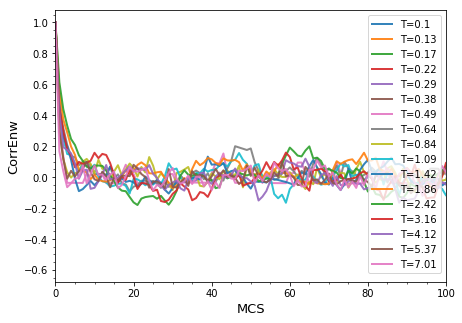

In [5]:
save = False

fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(1,1,1)
t = np.arange(len(nwpLcorrEnw_data[0][0]))
i = 1 # index of scales
k = 0 # index of temperature
step = 2

for j, item in enumerate(temperatures[::step]):
    if j == j:
        ax1.plot(t,nwpLcorrEnw_data[i][j*step], linewidth=2, label=('T={}'.format(np.around(item,2))), alpha=0.9)

    
ax1.set_xlabel('MCS',fontsize=13); ax1.set_ylabel('CorrEnw', fontsize=13)
ax1.legend()
ax1.set_xlim([0,100])
ax1.minorticks_on()

print('L = %d'%(possibleScales[i]))
#print('Correlation time (decay length) of the energy(nng):', LtauEnw[i])
#print('Correlation time (decay length) of the magnetization:', LtauM[i])
if save:
    plt.savefig('nwpRG1DcorrEnw_vs_t')

# Energy Function

In [6]:
nwpLdata = pickle.load(open('nwp1Dfinite_size_scaling_data.p', 'rb'))
nwpLen_nw_data = nwpLdata['Len_nw_data']; nwpLen_nw_err = nwpLdata['Len_nw_err']; nwpL_CvEnw_data = nwpLdata['L_CvEnw_data']
nwpLneg_data = nwpLdata['Lneg_data']; nwpLneg_err = nwpLdata['Lneg_err']; nwpLnwe_data = nwpLdata['Lnwe_data']
nwpLnwe_err = nwpLdata['Lnwe_err']; nwpL_Cv_neg_data = nwpLdata['L_Cv_neg_data']; nwpL_Cv_nwe_data = nwpLdata['L_Cv_nwe_data']
temperatures = nwpLdata['temperatures']; scales = nwpLdata['scales'];  t_prod = nwpLdata['t_prod']

Ldata = pickle.load(open('1Dfinite_size_scaling_data.p', 'rb'))
Len_data = Ldata['Len_data']; Len_err = Ldata['Len_err']; L_CvEdata = Ldata['L_CvEdata']
L_NEGdata = Ldata['L_NEGdata']; L_NEGerr = Ldata['L_NEGerr']; L_CvNEGdata = Ldata['L_CvNEGdata']
Len_nw_data = Ldata['Len_nw_data']; Len_nw_err = Ldata['Len_nw_err']; L_CvEnw_data = Ldata['L_CvEnw_data']
Lneg_data = Ldata['Lneg_data']; Lneg_err = Ldata['Lneg_err']; L_Cv_neg_data = Ldata['L_Cv_neg_data']
Lnwe_data = Ldata['Lnwe_data']; Lnwe_err = Ldata['Lnwe_err']; L_Cv_nwe_data = Ldata['L_Cv_nwe_data']
Itemperatures = Ldata['temperatures']; Iscales = Ldata['scales']; It_prod = Ldata['t_prod']

print('results with network probability were gathered from the following number of sampled configurations:', t_prod)
print('results for the regular Ising model were gathered from the following number of sampled configurations:', It_prod)

if not np.array_equal(temperatures, Itemperatures):
    raise ValueError('different temperatures or scales were used in simulation with network probability versus Ising model')
if not np.array_equal(scales,Iscales):
    raise ValueError('different scales were used in simulation with network probability versus Ising model')

results with network probability were gathered from the following number of sampled configurations: 10000
results for the regular Ising model were gathered from the following number of sampled configurations: 25000


In [7]:
nwpLen_nw_terr = uncorr_err(nwpLen_nw_err, nwpLtauEnw_data); Len_terr = uncorr_err(Len_err, LtauEdata)
print(nwpLen_nw_terr)
print(Len_terr)

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.49032372  0.49032372  1.02323568  1.26854888
   1.56578133  2.01445838  2.48037416  2.92267196  3.55293694  4.16331683
   4.87268146  5.51604826  6.32085608  6.98937024  7.72856421  8.59683997
   9.21312465  9.68689557  9.82226512  9.92586784  9.8175185   9.69390745
   9.52282879  9.30432579  9.21501047  9.06829944]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.88400058  1.08670135  1.80117071
   2.36081851  3.08763213  3.79022805  4.72402928  5.62512564  6.53917772
   7.57222079  8.67934227  9.75027186 10.97823888 12.34048103 13.32737676
  14.26238288 15.35818261 15.58680279 15.54252615 15.22634135 15.02950739
  14.82948056 14.53069616 14.38333    14.24040276]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.49290879  1.09035857  1.69876956  2.33134188
   3.07239386  3.95143283  4.94644

##### Finite size scaling 

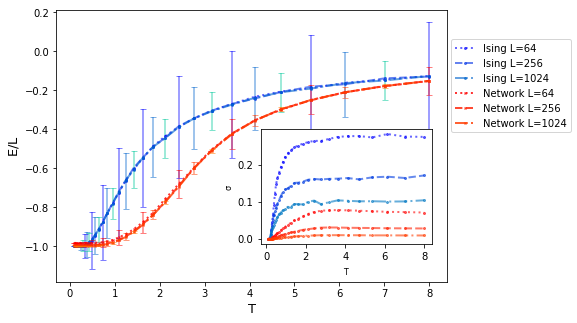

In [8]:
save = False

fig = plt.figure(figsize=(7,5))#; fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)#; ax2 = ax1.twinx()
ax1.set_xlabel('$\mathrm{T}$',fontsize=13)
ax1.set_ylabel('$\mathrm{E/L}$', fontsize=13)#, color='orange')
#ax2.set_ylabel('$\mathrm{E_{nw}/L}$', fontsize=13, color='r')
ls = [':', '--', '-.', '-'] #color=cm.viridis(i*70; cm.autumn; cm.winter
left, bottom, width, height = [0.53, 0.23, 0.34, 0.32]
ax3 = fig.add_axes([left, bottom, width, height])
ax3.set_xlabel('$\mathrm{T}$',fontsize=8)
ax3.set_ylabel('$\mathrm{\sigma}$', fontsize=8)

geom = 2

for i,L in enumerate(scales[0:]):
    ax1.plot(temperatures, Len_data[i]/L, marker='o', markersize=2, alpha=0.6, label='Ising L=%d'%(L), 
             color=cm.winter(i*50), linestyle=ls[i], linewidth=2)
    ax1.errorbar(temperatures[i:], Len_data[i][i:]/L, yerr=Len_terr[i][i:]/L, alpha=0.5, color=cm.winter(i*100), linestyle='', 
                 errorevery=3, capsize=3)
    ax3.plot(temperatures[i:], Len_terr[i][i:]/L,  marker='o', markersize=2, alpha=0.6, label='L=%d'%(L), color=cm.winter(i*60), 
             linestyle=ls[i], linewidth=2)
    
for i,L in enumerate(scales[0:]): 
    ax1.plot(temperatures, nwpLen_nw_data[i]/(geom*L), marker='x',markersize=2, alpha=0.8, label='Network L=%d'%(L), 
             color=cm.autumn(i*30), linestyle=ls[i], linewidth=2)
    ax1.errorbar(temperatures[i:], nwpLen_nw_data[i][i:]/(geom*L), yerr=nwpLen_nw_terr[i][i:]/(geom*L), alpha=0.5, 
                 color=cm.autumn(i*60), linestyle='', errorevery=3, capsize=3)
    ax3.plot(temperatures, nwpLen_nw_terr[i]/(geom*L),  marker='o', markersize=2, alpha=0.6, label='L=%d'%(L), 
             color=cm.autumn(i*30), linestyle=ls[i], linewidth=2)
    
ax1.legend(loc=[1.01,0.55]); 
#ax2.legend(loc='lower right')

if save:
    plt.savefig('nwpRG1D_L_E_Enw_vs_T')

In [9]:
LrEnwE = (np.array(nwpLen_nw_data))/(np.array(Len_data[:1]))
print(LrEnwE)

[[ 1.96875     1.96875     1.96875     1.96875     1.96875     1.96875
   1.96875     1.96877953  1.96907849  1.97009819  1.97455491  1.98843261
   2.02293524  2.07688257  2.14655742  2.23433165  2.34640103  2.48075908
   2.63190358  2.83667254  3.01668592  3.19864427  3.39460684  3.47642625
   3.51314817  3.46401923  3.3072985   3.12561658  3.03926718  2.90343052
   2.63375041  2.59767679  2.44840037  2.41418176]
 [ 7.96875     7.96875     7.96875     7.96875     7.96875     7.96875
   7.96875     7.96886953  7.97010492  7.9741885   7.99262788  8.04881005
   8.18836548  8.40721852  8.69059553  9.03985951  9.49357932 10.03623374
  10.6644558  11.48601986 12.21594753 12.93163043 13.75225248 14.16993603
  14.25852702 13.92413003 13.35718209 12.47881727 12.18971099 11.50187965
  10.59397432 10.41704046  9.73359396  9.62143083]
 [31.96875    31.96875    31.96875    31.96875    31.96875    31.96875
  31.96875    31.96922954 31.97417936 31.99059353 32.06407347 32.28977686
  32.84928988 33.72

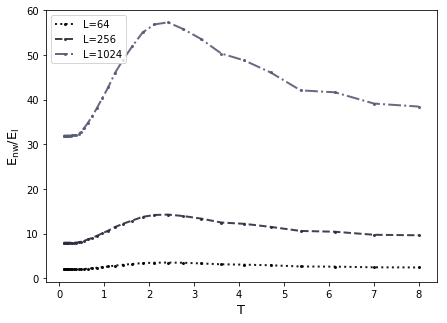

In [12]:
save = False

fig = plt.figure(figsize=(7,5))#; fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)#; ax2 = ax1.twinx()
ax1.set_xlabel('$\mathrm{T}$',fontsize=13)
ax1.set_ylabel('$\mathrm{E_{nw}/E_I}$', fontsize=13)#, color='orange')
ls = [':', '--', '-.', '-'] #color=cm.viridis(i*70)
left, bottom, width, height = [0.53, 0.38, 0.34, 0.32]
#ax3 = fig.add_axes([left, bottom, width, height])
#ax3.set_xlabel('$\mathrm{T}$',fontsize=8)
#ax3.set_ylabel('$\mathrm{\sigma}$', fontsize=8)

for i,L in enumerate(scales[0:]):
    ax1.plot(temperatures, LrEnwE[i], marker='o', markersize=2, alpha=0.9, label='L=%d'%(L), 
             color=cm.bone(i*50), linestyle=ls[i], linewidth=2)

    
ax1.legend(loc='upper left'); 
#ax2.legend(loc='lower right')

if save:
    plt.savefig('nwpRG1D_LrEnwE_vs_T')

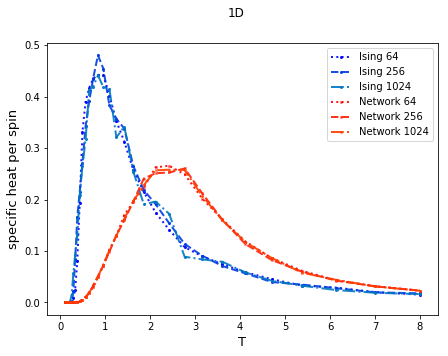

In [13]:
save = False

fig1 = plt.figure(figsize=(7,5)); fig1.suptitle('1D')
ax11 = fig1.add_subplot(1,1,1)#; ax12 = ax11.twinx()
ax11.set_xlabel('$\mathrm{T}$',fontsize=13)
ax11.set_ylabel('specific heat per spin', fontsize=13)#, color='orange')
#ax12.set_ylabel('Network specific heat per spin', fontsize=13, color='r')
ls = [':', '--', '-.', '-']

geom = 2

for i,L in enumerate(scales):
    ax11.plot(temperatures, L_CvEdata[i]/L, marker='o', markersize=2, alpha=0.9, label='Ising %d'%(L), color=cm.winter(i*60),
              linestyle=ls[i], linewidth=2)
for i,L in enumerate(scales):   
    ax11.plot(temperatures, nwpL_CvEnw_data[i]/(geom*L), marker='x',markersize=2, alpha=0.9, label='Network %d'%(L), color=cm.autumn(i*30),
              linestyle=ls[i], linewidth=2)
ax11.legend(loc='upper right')
#ax12.legend(loc='center right')

if save:
    plt.savefig('nwpRG1D_L_CvE_CvEnw_vs_T')

##### RG energy~inner edges

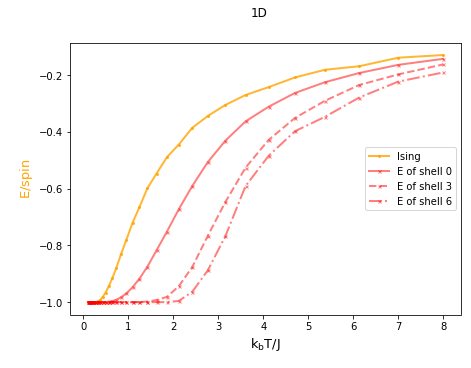

In [14]:
save = False
Lidx  = 1 # scale index
L = scales[Lidx]
nRGsteps = len(Lneg_data[Lidx][0,:])
step = 3

fig = plt.figure(figsize=(7,5)); fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('$\mathrm{k_bT/J}$',fontsize=13)
ax1.set_ylabel('$\mathrm{E/spin}$', fontsize=13, color='orange')
ls = ['-', '--', '-.', ':']#color=cm.viridis(i*70)
tel = 0

ax1.plot(temperatures, Len_data[Lidx]/L, marker='o', markersize=2, alpha=0.8, label='Ising', color='orange', 
             linestyle=ls[0], linewidth=2)
for i in range(nRGsteps)[::step]:
    l = np.arange(nRGsteps)
    n_l = L/(2**l)
    ax1.plot(temperatures, nwpLnwe_data[Lidx][:,i]/n_l[i], marker='x', markersize=3, alpha=0.5, label='E of shell %d'%(i), 
             color='r', linestyle=ls[tel], linewidth=2)
    #ax1.errorbar(temperatures, Len_data[i], yerr=Len_err[i], alpha=0.2, color=cm.viridis(i*70), linestyle='')

    #ax2.errorbar(temperatures, Lneg_data[i], yerr=Lnng_err[i], alpha=0.2, color=cm.viridis(i*70), linestyle='')
    tel += 1
    tel %= len(ls)
    
ax1.legend(loc='center right'); 
#ax2.legend(loc='lower right')
ax1.annotate('L=%d'%(L), (0,0.7))

if save:
    plt.savefig('nwpRG1D_Enwe_vs_T_L=%d'%(L))

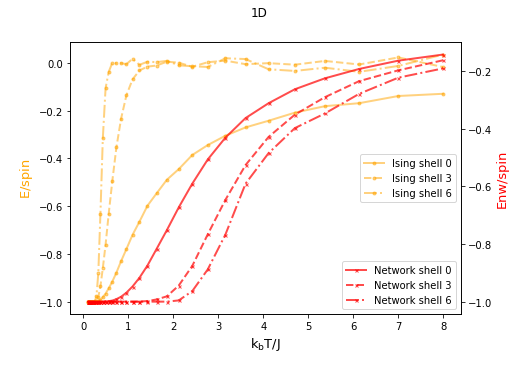

In [15]:
save = False
Lidx  = 1 # scale index
L = scales[Lidx]
nRGsteps = len(nwpLneg_data[Lidx][0,:])
step = 3

fig = plt.figure(figsize=(7,5)); fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1); ax2 = ax1.twinx()
ax1.set_xlabel('$\mathrm{k_bT/J}$',fontsize=13)
ax1.set_ylabel('$\mathrm{E/spin}$', fontsize=13, color='orange')
ax2.set_ylabel('Enw/spin', fontsize=13, color='r')
ls = ['-', '--', '-.', ':']#color=cm.viridis(i*70)
tel = 0

for i in range(nRGsteps)[::step]:
    l = np.arange(nRGsteps)
    n_l = L/(2**l)
    ax1.plot(temperatures, Lnwe_data[Lidx][:,i]/n_l[i], marker='o', markersize=3, alpha=0.5, label='Ising shell %d'%(i), 
             color='orange', linestyle=ls[tel], linewidth=2)
    #ax1.errorbar(temperatures, Len_data[i], yerr=Len_err[i], alpha=0.2, color=cm.viridis(i*70), linestyle='')
    ax2.plot(temperatures, nwpLnwe_data[Lidx][:,i]/n_l[i], marker='x',markersize=3, alpha=0.7, label='Network shell %d'%(i), 
             color='r', linestyle=ls[tel], linewidth=2)
    #ax2.errorbar(temperatures, Lneg_data[i], yerr=Lnng_err[i], alpha=0.2, color=cm.viridis(i*70), linestyle='')
    tel += 1
    tel %= len(ls)
    
ax1.legend(loc='center right'); 
ax2.legend(loc='lower right')
ax1.annotate('L=%d'%(L), (0,0.2))

if save:
    plt.savefig('nwpRG1D_nwe_vs_T_L=%d'%(L))

##### Magnetization 

In [16]:
nwpLdata_mag = pickle.load(open('nwp1Dfinite_size_scaling_data_mag.p', 'rb'))
nwpLmag_data= nwpLdata_mag['Lmag_data']; nwpLmag_err = nwpLdata_mag['Lmag_err']; nwpLsusc_data = nwpLdata_mag['Lsusc_data']
temperatures = nwpLdata_mag['temperatures']; scales = nwpLdata_mag['scales']

Ldata_mag = pickle.load(open('1Dfinite_size_scaling_data_mag.p', 'rb'))
Lmag_data= Ldata_mag['Lmag_data']; Lmag_err = Ldata_mag['Lmag_err']; Lsusc_data = Ldata_mag['Lsusc_data']
Itemperatures = Ldata_mag['temperatures']; Iscales = Ldata_mag['scales']

if not np.array_equal(temperatures, Itemperatures):
    raise ValueError('different temperatures or scales were used in simulation with network probability versus Ising model')
if not np.array_equal(scales,Iscales):
    raise ValueError('different scales were used in simulation with network probability versus Ising model')

In [17]:
nwpLmag_terr = uncorr_err(nwpLmag_err, nwpLtauMdata); Lmag_terr = uncorr_err(Lmag_err, LtauMdata)
print(nwpLmag_terr)
print(Lmag_terr)

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.77888562  0.77888562  1.62542321  2.01510643
   2.48726405  3.19999339  3.94010668  4.64706438  5.64417831  6.64446007
   7.81790281  9.01594922 11.49617856 11.96826577 13.65663372 16.12112271
  18.37185843 19.40186187 19.63326794 19.09543469 18.19779445 17.23500557
  16.31438138 15.48028294 15.10603644 14.32897674]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          1.66350457  2.04494511  3.38942733
   4.44256767  5.79966468  7.13733429  8.90349014 10.65899527 12.36795582
  14.40955282 16.63840186 19.21102606 22.37533606 26.49479157 30.62962865
  39.81928316 44.24175181 45.10265071 42.68373488 38.20049275 35.38364262
  32.46684872 29.92025689 28.60280015 27.29920293]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          1.04898644  2.32045233  3.61524539  4.96145749
   6.53853117  8.41553278 10.52737

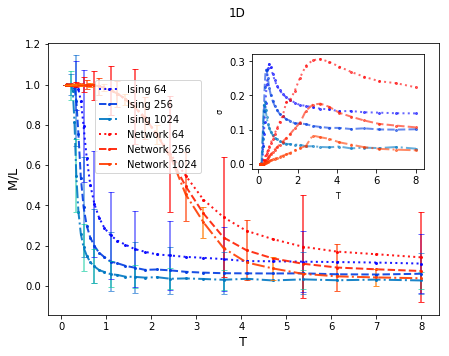

In [18]:
save = False

fig = plt.figure(figsize=(7,5)); fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('$\mathrm{T}$',fontsize=13)
ax1.set_ylabel('$\mathrm{M/L}$', fontsize=13)#, color='b')
ls = [':', '--', '-.', '-'] #color=cm.viridis(i*70)
left, bottom, width, height = [0.53, 0.53, 0.34, 0.32]
ax3 = fig.add_axes([left, bottom, width, height])
ax3.set_xlabel('$\mathrm{T}$',fontsize=8)
ax3.set_ylabel('$\mathrm{\sigma}$', fontsize=8)

for i,L in enumerate(scales):
    ax1.plot(temperatures, Lmag_data[i]/L, marker='o', markersize=2, alpha=0.9, label='Ising %d'%(L), 
             color=cm.winter(i*60), linestyle=ls[i], linewidth=2)
    ax1.errorbar(temperatures, Lmag_data[i]/L, yerr=Lmag_terr[i]/L, alpha=0.6, color=cm.winter(i*100), linestyle='', 
                 capsize=3, errorevery=3)
    ax3.plot(temperatures[i:], Lmag_terr[i][i:]/L,  marker='o', markersize=2, alpha=0.6, label='L=%d'%(L), color=cm.winter(i*60), 
             linestyle=ls[i], linewidth=2)
    
for i,L in enumerate(scales):
    ax1.plot(temperatures, nwpLmag_data[i]/L, marker='o', markersize=2, alpha=0.9, label='Network %d'%(L), 
             color=cm.autumn(i*30), linestyle=ls[i], linewidth=2)
    ax1.errorbar(temperatures[i:], nwpLmag_data[i][i:]/L, yerr=nwpLmag_terr[i][i:]/L, alpha=0.8, color=cm.autumn(i*60), 
                 linestyle='', capsize=3, errorevery=3)
    ax3.plot(temperatures, nwpLmag_terr[i]/L,  marker='o', markersize=2, alpha=0.6, label='L=%d'%(L), color=cm.autumn(i*30), 
             linestyle=ls[i], linewidth=2)
    
ax1.legend(loc=[0.12,0.52])

if save:
    plt.savefig('nwpRG1D_L_M_vs_T')

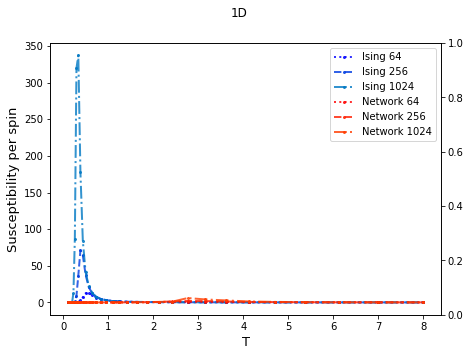

In [19]:
save = False

fig1 = plt.figure(figsize=(7,5)); fig1.suptitle('1D')
ax11 = fig1.add_subplot(1,1,1); ax12 = ax11.twinx()
ax11.set_xlabel('$\mathrm{T}$',fontsize=13)
ax11.set_ylabel('Susceptibility per spin', fontsize=13)#, color='b')
ls = [':', '--', '-.', '-']

for i,L in enumerate(scales):
    ax11.plot(temperatures, Lsusc_data[i]/L, marker='o', markersize=2, alpha=0.8, label='Ising %d'%(L), color=cm.winter(i*60),
            linestyle=ls[i], linewidth=2)

for i,L in enumerate(scales):
    ax11.plot(temperatures, nwpLsusc_data[i]/L, marker='o', markersize=2, alpha=0.8, label='Network %d'%(L), 
              color=cm.autumn(i*30), linestyle=ls[i], linewidth=2)

ax11.legend()

if save:
    plt.savefig('nwpRG1Dsusc_vs_T')

# Free energy

In [20]:
nwpLf_data = pickle.load(open('nwp1Dfree_energy_finite_size_scaling.p', 'rb'))
f_exact = nwpLf_data['f_exact']; Len_nw_fr = nwpLf_data['Len_nw_fr']; Len_nwS = nwpLf_data['Len_nwS'] 
Len_nw_data = nwpLf_data['Len_nw_data'] ; Len_nw_err = nwpLf_data['Len_nw_err'] 
Len_nw_hist_data = nwpLf_data['Len_nw_hist_data']; Len_nw_bin_edges_data = nwpLf_data['Len_nw_bin_edges_data']
temperatures = nwpLf_data['temperatures']; scales = nwpLf_data['scales']; t_prod = nwpLf_data['t_prod']

Lf_data = pickle.load(open('1Dfree_energy_finite_size_scaling.p', 'rb'))
Len_fr = Lf_data['Len_fr']; LenS = Lf_data['LenS']; Len_data = Lf_data['Len_data']; Len_err = Lf_data['Len_err']; 
Itemperatures = Lf_data['temperatures']; Iscales= Lf_data['scales']; It_prod = Lf_data['t_prod'] 

if not np.array_equal(temperatures, Itemperatures):
    raise ValueError('different temperatures or scales were used in simulation with network probability versus Ising model')
if not np.array_equal(scales,Iscales):
    raise ValueError('different scales were used in simulation with network probability versus Ising model')
    
print('results with network probability were gathered from the following number of sampled configurations:', t_prod)
print('results for the regular Ising model were gathered from the following number of sampled configurations:', It_prod)

results with network probability were gathered from the following number of sampled configurations: 20000
results for the regular Ising model were gathered from the following number of sampled configurations: 40000


In [21]:
Len_nw_fr_err = []; Len_fr_err = []


for i,L in enumerate(scales):
    e = abs((Len_nw_fr[i]/L)-f_exact)
    Len_nw_fr_err.append(e)
    Ie = abs((Len_fr[i]/L)-f_exact)
    Len_fr_err.append(Ie)


##### Energy histograms 

In [22]:
def check_visual(i, hists, bins):

    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot(1,1,1)
    
    b1 = bins[i]
    h1 = hists[i]
    #print(h1)
    l = np.argmax(h1)
    temperature1 = temperatures[i]
    
    b2 = bins[i+1]
    h2 = hists[i+1]
    k = np.argmax(h2)+1
    temperature2 = temperatures[i+1]
    
    ax.plot(b1/L, h1,label='T=%.2f'%(temperature1), markersize=3, linestyle='-', marker='o', linewidth=1, color='#1f77b4')
    ax.plot(b1[l:]/L, h1[l:], markersize=6, color='#1f77b4', marker='o', linewidth=2)
    
    ax.plot(b2/L, h2,label='T=%.2f'%(temperature2), markersize=3, linestyle='-', marker='o', linewidth=1, color='orange')
    ax.plot(b2[:k]/L, h2[:k], markersize=6, color='orange', marker='o', linewidth=2)
    
    ax.legend()
    #ax5.set_yscale('log')

L=64


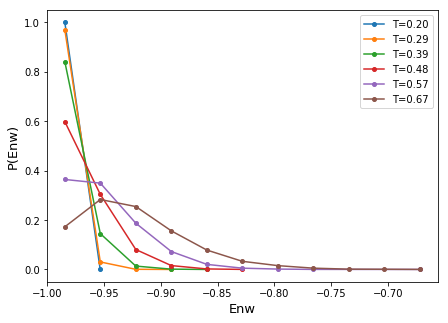

In [23]:
%matplotlib inline
fig5 = plt.figure(figsize=(7,5))
ax5 = fig5.add_subplot(1,1,1)
ax5.set_xlabel('Enw', fontsize=13)
ax5.set_ylabel('P(Enw)', fontsize=13)

idx = 0
L = scales[idx]
print('L=%d'%(L))
l = 1
k = 6
for i,temperature in enumerate(temperatures[l:k+1]):
    ax5.plot(Len_nw_bin_edges_data[idx][l+i]/(L), Len_nw_hist_data[idx][l+i],label='T=%.2f'%(temperature), markersize=4, 
             linestyle='-',  marker='o')
    
ax5.legend()
#ax5.set_yscale('log')

save = False
if save:
    plt.savefig('nwpRG1Den_nw_hist_%d_%d'%(l,k))

In [24]:
print('L=%d'%(L))
wg.interact(check_visual, hists=wg.fixed(Len_nw_hist_data[idx]), bins=wg.fixed(Len_nw_bin_edges_data[idx]), 
            i=(0,len(temperatures)-2))

L=64


interactive(children=(IntSlider(value=11, description='i', max=23), Output()), _dom_classes=('widget-interact'â€¦

<function __main__.check_visual(i, hists, bins)>

##### Free energy finite size scaling 

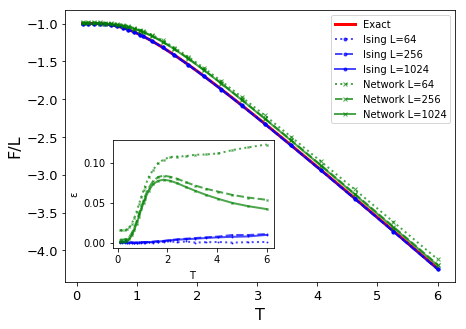

In [25]:
save = False
fig = plt.figure(figsize=(7,5))#; fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('$\mathrm{T}$',fontsize=16)
ax1.set_ylabel('F/L', fontsize=16)#, color='b')
ax1.tick_params(axis='both', which='both', labelsize=13)
ls = [':', '--', '-'] #color=cm.viridis(i*70)
ax1.plot(temperatures, f_exact, alpha=1, label='Exact', color='r', linewidth=3)

left, bottom, width, height = [0.22, 0.22, 0.32, 0.3]
ax3 = fig.add_axes([left, bottom, width, height])
ax3.set_xlabel('$\mathrm{T}$',fontsize=10)
ax3.set_ylabel('$\mathrm{\epsilon}$', fontsize=10)

for i,L in enumerate(scales):
    ax1.plot(temperatures, Len_fr[i]/L, marker='o', markersize=3, alpha=0.7, label='Ising L=%d'%(L), 
             linestyle=ls[i], linewidth=2, color='b')
    #ax1.errorbar(temperatures, Len_data[i], yerr=Len_err[i], alpha=0.2, color=cm.viridis(i*70), linestyle='')
    ax3.plot(Itemperatures, Len_fr_err[i], marker='o',markersize=1, alpha=0.7, label='Ising L=%d'%(L), color='b', 
            linestyle=ls[i], linewidth=2)
for i,L in enumerate(scales):
    ax1.plot(temperatures, Len_nw_fr[i]/L, marker='x',markersize=4, alpha=0.7, label='Network L=%d'%(L), color='g', 
             linestyle=ls[i], linewidth=2)
    ax3.plot(temperatures, Len_nw_fr_err[i], marker='x',markersize=2, alpha=0.7, label='Network L=%d'%(L), color='g', 
            linestyle=ls[i], linewidth=2)
    
ax1.legend(loc='upper right', ncol=1)

if save:
    plt.savefig('nwpRG1D_Len_fr_Len_nw_fr_vs_T')

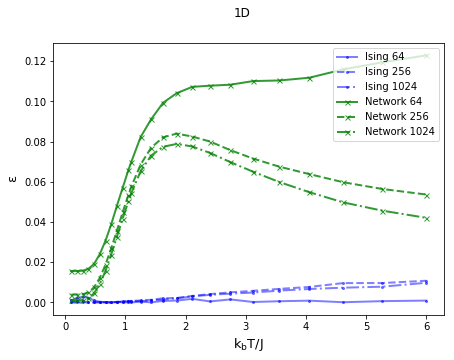

In [26]:
save = False

fig = plt.figure(figsize=(7,5)); fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('$\mathrm{k_bT/J}$',fontsize=13)
ax1.set_ylabel('$\mathrm{\epsilon}$', fontsize=13)#, color='b')
ls = ['-', '--', '-.', ':']#color=cm.viridis(i*70)

for i,L in enumerate(scales):
    ax1.plot(temperatures, Len_fr_err[i], marker='o', markersize=2, alpha=0.5, label='Ising %d'%(L), 
             linestyle=ls[i], linewidth=2, color='b')
for i,L in enumerate(scales):
    ax1.plot(temperatures, Len_nw_fr_err[i], marker='x',markersize=5, alpha=0.8, label='Network %d'%(L), color='g', 
             linestyle=ls[i], linewidth=2)
    
#ax1.legend(loc='upper left'); 
ax1.legend()

if save:
    plt.savefig('nwpRG1D_Len_fr_err_Len_nw_fr_err_vs_T')

Entropy:

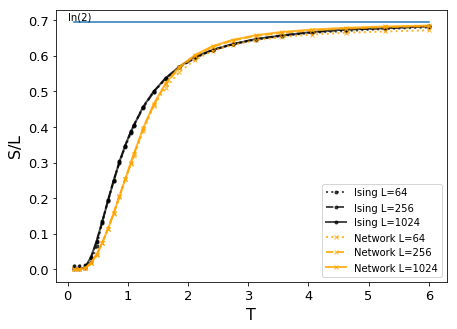

In [27]:
save = False

fig = plt.figure(figsize=(7,5))#; fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('$\mathrm{T}$',fontsize=16)
ax1.set_ylabel('$\mathrm{S/L}$', fontsize=16, color='black')
#ax1.set_ylim(-0.1,0.76)
ax1.tick_params(axis='both', which='both', labelsize=13)
ls = [':', '--', '-']#color=cm.viridis(i*70)

ax1.plot(temperatures, np.tile(np.log(2), len(temperatures)))
ax1.annotate('ln(2)', (0,0.7))

for i,L in enumerate(scales):
    ax1.plot(temperatures, LenS[i]/L, marker='o', markersize=3, alpha=0.7, label='Ising L=%d'%(L), 
             linestyle=ls[i], linewidth=2, color='black') 
for i,L in enumerate(scales):    
    ax1.plot(temperatures, Len_nwS[i]/L, marker='x',markersize=4, alpha=0.8, label='Network L=%d'%(L), color='orange', 
             linestyle=ls[i], linewidth=2)
    #Smax = (1-(2/L))*np.log(2)
    #ax1.plot(temperatures, np.tile(Smax, len(temperatures)), c='c')

ax1.legend(loc='lower right')


if save:
    plt.savefig('nwpRG1D_LenS_Len_nwS_vs_T')